In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import warnings 
import os
warnings.filterwarnings('ignore')

In [ ]:
import tensorflow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
cd /content/drive/MyDrive/cell_infection

/content/drive/MyDrive/cell_infection


In [ ]:
ls

cell_images.zip  cell_infection.ipynb


In [ ]:
!unzip cell_images.zip

Streaming output truncated to the last 5000 lines.
 extracting: cell_images/train/uninfected/C228ThinF_IMG_20151112_142452_cell_245.png  
 extracting: cell_images/train/uninfected/C228ThinF_IMG_20151112_142452_cell_251.png  
 extracting: cell_images/train/uninfected/C228ThinF_IMG_20151112_142452_cell_261.png  
 extracting: cell_images/train/uninfected/C228ThinF_IMG_20151112_142452_cell_41.png  
 extracting: cell_images/train/uninfected/C228ThinF_IMG_20151112_142452_cell_54.png  
 extracting: cell_images/train/uninfected/C228ThinF_IMG_20151112_142452_cell_57.png  
 extracting: cell_images/train/uninfected/C228ThinF_IMG_20151112_142452_cell_85.png  
 extracting: cell_images/train/uninfected/C228ThinF_IMG_20151112_142730_cell_104.png  
 extracting: cell_images/train/uninfected/C228ThinF_IMG_20151112_142730_cell_109.png  
 extracting: cell_images/train/uninfected/C228ThinF_IMG_20151112_142730_cell_128.png  
 extracting: cell_images/train/uninfected/C228ThinF_IMG_20151112_142730_cell_142.pn

In [ ]:
train_path = '/content/drive/MyDrive/cell_infection/cell_images/train'
test_path = '/content/drive/MyDrive/cell_infection/cell_images/test'

In [ ]:
os.listdir(train_path + '/parasitized/')
para_cell = train_path + '/parasitized/' + 'C100P61ThinF_IMG_20150918_144104_cell_162.png'

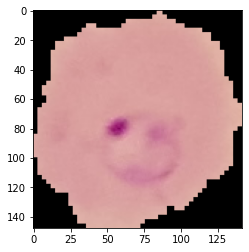

In [ ]:
plt.imshow(imread(para_cell))

In [ ]:
os.listdir(train_path + '/uninfected/')
uninfected_cell = train_path + '/uninfected/' + 'C115P76ThinF_IMG_20150930_162038_cell_198.png'

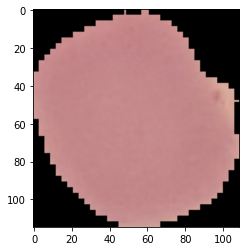

In [ ]:
plt.imshow(imread(uninfected_cell))

In [ ]:
len(os.listdir(train_path + '/uninfected/'))

12480

In [ ]:
len(os.listdir(train_path + '/parasitized/'))

12480

In [ ]:
imread(uninfected_cell).shape

(115, 109, 3)

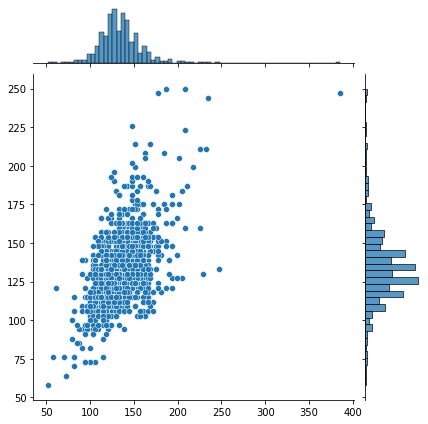

In [ ]:
import seaborn as sns
dim1 = []
dim2 = []
for image in os.listdir(test_path + '/parasitized/'):
  img = imread(test_path + '/parasitized/' + image)
  d1, d2, colors = img.shape
  dim1.append(d1)
  dim2.append(d2)

sns.jointplot(dim1, dim2)

In [ ]:
print(np.mean(dim1))
print(np.mean(dim2))

134.64307692307693
133.31846153846155


In [ ]:
image_shape = (130, 130, 3)

In [ ]:
train_data_gen = ImageDataGenerator(rotation_range=30, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.4, horizontal_flip=True, rescale=1/255,)

In [ ]:
test_data_gen = ImageDataGenerator(rescale=1/255)

In [ ]:
training_set = train_data_gen.flow_from_directory(train_path, target_size=image_shape[:2], class_mode='binary', batch_size=32)
testing_set = test_data_gen.flow_from_directory(test_path, target_size=image_shape[:2], class_mode='binary', batch_size=32)

Found 24958 images belonging to 2 classes.
Found 2600 images belonging to 2 classes.


In [ ]:
training_set.class_indices

{'parasitized': 0, 'uninfected': 1}

In [ ]:
next(training_set)[0].shape

(32, 130, 130, 3)

In [ ]:
next(training_set)[1].shape

(32,)

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=image_shape))
model.add(MaxPooling2D())

model.add(Conv2D(64, kernel_size=(3,3), activation='relu',))
model.add(MaxPooling2D())

model.add(Conv2D(128, kernel_size=(3,3), activation='relu',))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(128, activation='relu', ))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=2)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
losses = pd.DataFrame(model.history.history)

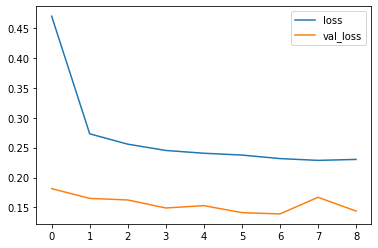

In [ ]:
losses[['loss', 'val_loss']].plot()

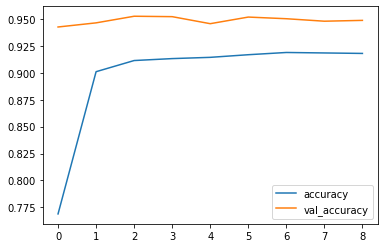

In [ ]:
losses[['accuracy', 'val_accuracy']].plot()

In [ ]:
model.evaluate(testing_set)

82/82 [==============================] - 8s 97ms/step - loss: 0.1441 - accuracy: 0.9488


[0.14408262073993683, 0.948846161365509]

In [ ]:
model.save('classifier.h5')